<a href="https://colab.research.google.com/github/Viny2030/UMSA/blob/main/rg_01_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

# **Regresión**


# ***Modelos de Regresion***

***Supóngase que el departamento de ventas de una empresa quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre el número de ventas de un producto. Se dispone de un conjunto de datos que contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así como la cantidad de presupuesto, también en millones, destinado a anuncios por radio, TV y periódicos en cada una de ellas.***


## **Bibliotecas**

### **Instalando bibliotecas**

In [1]:
!pip install plotly --upgrade

### **Análisis de datos**

In [2]:
import numpy as np
import pandas as pd
from math import sqrt

### **Gráficos**

In [3]:
import plotly.express as px
import matplotlib.pyplot as plt

### **Preprocesado y modelado**

#### **Con Scikit-learn**

In [4]:
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### **Metricas**

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

In [6]:
import warnings
warnings.filterwarnings('ignore')

## **Conjunto de Datos**

In [7]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/publicidad_multiple.csv"

## ***Dataframe***

In [8]:
datos = pd.read_csv(url, index_col = 0)

In [9]:
datos.head(10)

,ventas,radio,tv,periodico
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## **Relación entre variables**

***El primer paso a la hora de establecer un modelo lineal múltiple es estudiar la relación que existe entre variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores. A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas.***

In [10]:
corr_matrix = round(datos.corr(),3)

### **Matriz de correlaciones**

In [11]:
px.imshow(corr_matrix,
          title = "Matriz de correlacion",
          text_auto = True,
          template = "gridon",
          labels={"color":"Coeficiente"})

### **Estadisticas descriptivas del conjunto de datos**

In [100]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
ventas,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
tv,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
periodico,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [99]:
for i in datos.columns:
  print(f"{i}:\n   count: {len(datos[i])},\n   mean: {round(datos[i].mean(),2)}\n   median: {round(datos[i].median(),2)}\n   std: {round(datos[i].std(),2)}\n")


ventas:
   count: 200,
   mean: 147.04
   median: 149.75
   std: 85.85

radio:
   count: 200,
   mean: 23.26
   median: 22.9
   std: 14.85

tv:
   count: 200,
   mean: 30.55
   median: 25.75
   std: 21.78

periodico:
   count: 200,
   mean: 14.02
   median: 12.9
   std: 5.22



In [96]:
# Assuming 'datos' is your DataFrame and 'i' holds the title
fig = px.scatter_matrix(datos,
                   dimensions=["radio","tv","periodico", "ventas"],  # Specify columns to include in the matrix
                   template="gridon",
                   title=i)

fig.show()

### **Gráfico de distribución para cada variable numérica**

In [12]:
datos.columns

Index(['ventas', 'radio', 'tv', 'periodico'], dtype='object')

In [13]:
datos.columns[1:4]

Index(['radio', 'tv', 'periodico'], dtype='object')

In [14]:
for i in datos.columns[1:4]:
  fig = px.scatter(datos,
                   x = i,
                   y = datos.ventas,
                   template = "gridon",
                   title = i)

  fig.show()

## ***Ajuste del modelo***

**Se ajusta un modelo lineal múltiple con el objetivo de predecir las ventas en función de la inversión en los tres canales de publicidad.**


### **División de los datos en train y test**

In [15]:
X = datos[["radio","tv","periodico"]]
y = datos[["ventas"]]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 12345)

### **Creación del modelo**

### **Decision Tree Regressor**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor


In [17]:
modelo = DecisionTreeRegressor(max_depth=3, random_state=0)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [18]:
modelo

DecisionTreeRegressor(max_depth=3, random_state=0)

In [19]:
modelo.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

#### ***Información del modelo***

In [20]:
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Coeficiente de determinación R^2: 0.7818883644643493


### **Predicción**

In [21]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

[253.48823529 132.99230769  62.77058824]


In [22]:
X_test["Ventas"] = y_test
X_test["Prediccion"] = predicciones
X_test.head(9)

,radio,tv,periodico,Ventas,Prediccion
52,41.7,39.6,22.6,216.4,253.488235
157,1.3,24.3,10.1,149.8,132.992308
135,47.0,8.5,11.6,48.3,62.770588
140,17.0,12.9,10.9,73.4,62.770588
56,28.1,41.4,5.5,7.3,15.830769
95,31.6,52.9,16.9,163.3,162.046667
54,28.8,15.9,20.2,262.7,253.488235
50,3.1,34.6,11.4,199.8,132.992308
17,39.6,55.8,24.4,281.4,253.488235


### **Evaluacion del modelo**

#### **Error de la media de los cuadrados - MSE**

In [23]:
round(sqrt(mean_squared_error(y_test, predicciones)),3)

46.699

#### **Error de la media absoluta - MAE**


In [24]:
round(metrics.median_absolute_error(y_test, predicciones),3)

21.172

#### **Coeficiente de determinación ($R^2$)**


In [25]:
round(metrics.r2_score(y_test, predicciones),3)

0.757

## **Graficando el modelo**

In [26]:
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

Profundidad del árbol: 3
Número de nodos terminales: 8


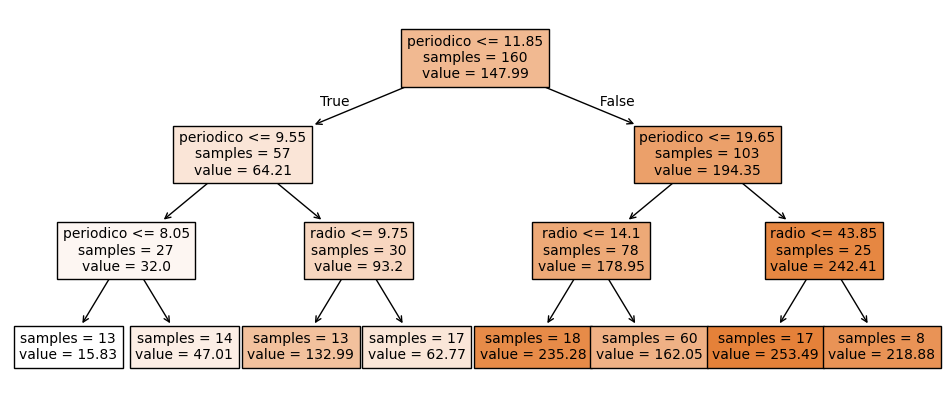

In [27]:
fig, ax = plt.subplots(figsize=(12, 5))

plot = plot_tree(
            decision_tree = modelo,
            feature_names = datos.drop(columns = "ventas").columns,
            class_names   = datos.ventas,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax)

## **Graficando Residuos**

In [28]:
from sklearn.metrics import PredictionErrorDisplay

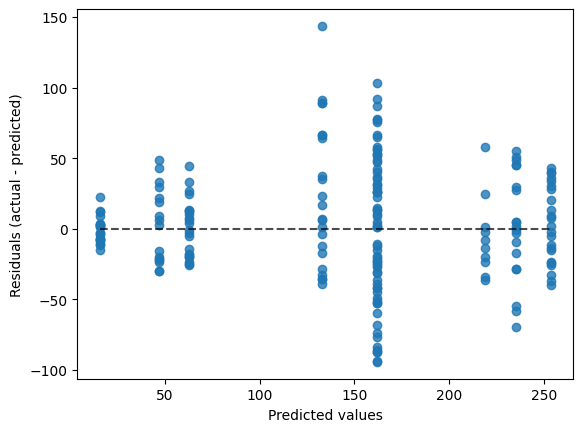

In [29]:
y_true = y['ventas'].values  # Asumo ventas como variable objetivo con sus valores

# Uso el reshape para graficas
disp = PredictionErrorDisplay.from_estimator(modelo, X, y_true)
plt.show()

## **Graficando predicciones y residuos**

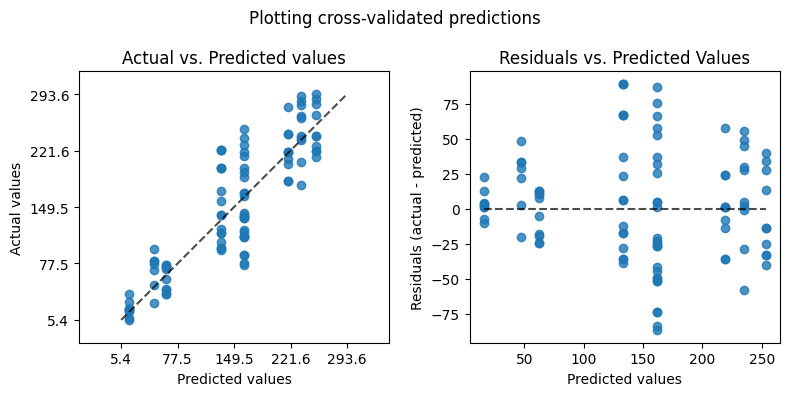

In [30]:
from sklearn.metrics import PredictionErrorDisplay


y_true = y['ventas'] # Asumo ventas como variable objetivo

# Now use the reshaped y_true for plotting
y_pred = modelo.predict(X)  # Calculo la prediccion

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## **Importancia de las variables**

In [31]:
!pip install mljar-scikit-plot

  Preparing metadata (setup.py) ... done
  Created wheel for mljar-scikit-plot: filename=mljar_scikit_plot-0.3.12-py3-none-any.whl size=32014 sha256=9d67f4fdc801fd197f523bdab43c948dd49871ad7e581a703073883daf7fea90
  Stored in directory: /root/.cache/pip/wheels/f1/02/59/22b0e9bcc992a79df54193032d45720f9713bd3065617ef4a5
Successfully built mljar-scikit-plot


In [32]:
import scikitplot as skplt

<Axes: title={'center': 'Feature Importance Decision Tree Regressor'}>

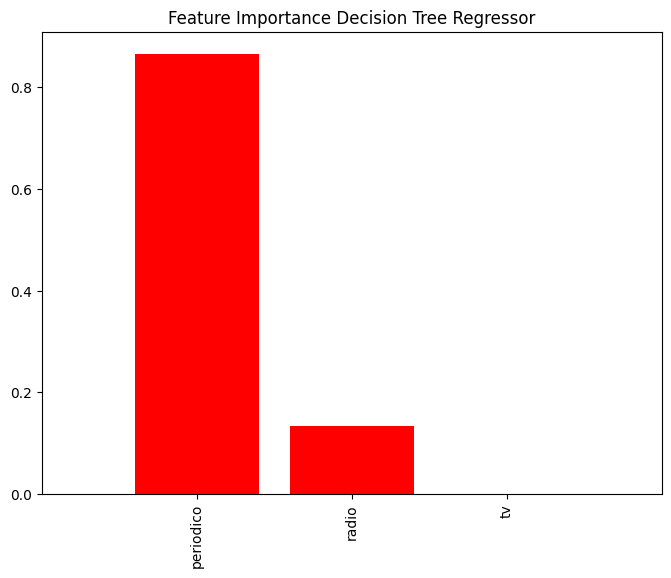

In [33]:
skplt.estimators.plot_feature_importances(
 modelo,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance Decision Tree Regressor",
 x_tick_rotation=90,
)

## **Importancia de predictores**

**La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el mse, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.**

In [34]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.866105
0,radio,0.133895
1,tv,0.000000


In [35]:
modelo = modelo.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 33.59260590390003
MSE: 2180.8052228044044
RMSE: 46.69909231242514
MEDIAN ABSOLUTE ERROR: 21.172115384615385
Coeficiente de determinación R^2: 0.7818883644643493
Explained_variance_score: 0.7882027826698654
Max Error: 143.7076923076923


<Axes: title={'center': 'Feature Importance XGB Classifier'}>

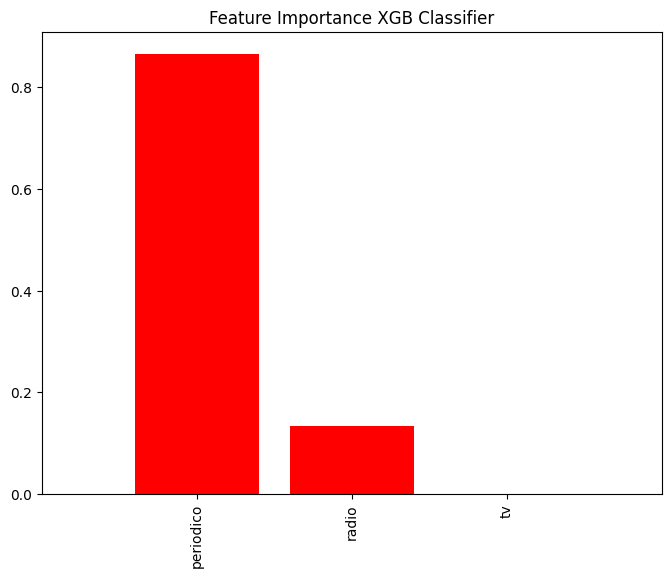

In [36]:
skplt.estimators.plot_feature_importances(
 modelo,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance XGB Classifier",
 x_tick_rotation=90,
)

### **Optimizacion Arbol de Decision**

In [37]:
params = {'criterion': ['squared_error'], 'splitter': ['best'], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [1]
, 'min_weight_fraction_leaf': [0.0], 'max_features': [None], 'random_state': [None], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0]
, 'ccp_alpha': [0.0]}


In [38]:
grid = GridSearchCV(estimator=modelo, param_grid=params, cv=5)


In [39]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
             param_grid={'ccp_alpha': [0.0], 'criterion': ['squared_error'],
                         'max_depth': [None], 'max_features': [None],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'random_state': [None], 'splitter': ['best']})

In [40]:
grid =  GridSearchCV(estimator=modelo, param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid.score(X, y))


MAE: 17.3525
MSE: 649.15675
RMSE: 25.47855470783223
MEDIAN ABSOLUTE ERROR: 9.400000000000002
Coeficiente de determinación R^2: 0.9822975639863849


## **Graficando el modelo optimizado**

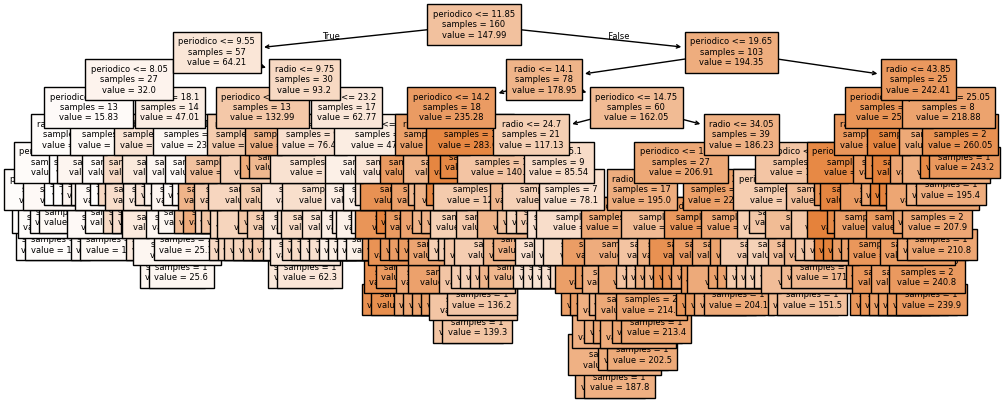

In [41]:
fig, ax = plt.subplots(figsize=(12, 5))


plot = plot_tree(
            decision_tree = grid.best_estimator_,
            feature_names = datos.drop(columns = "ventas").columns,
            class_names   = datos.ventas,
            filled        = True,
            impurity      = False,
            fontsize      = 6,
            precision     = 2,
            ax            = ax)

In [42]:
from sklearn.metrics import PredictionErrorDisplay

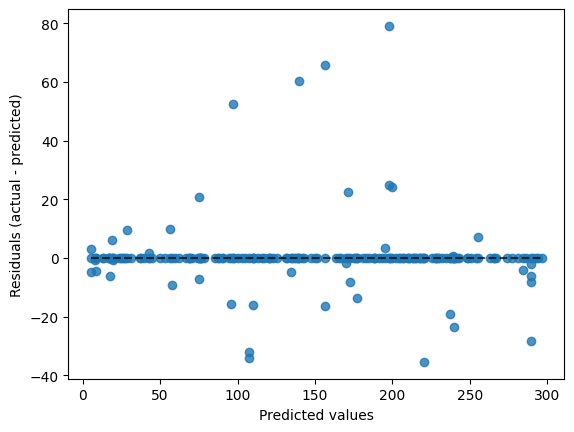

In [43]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(grid, X, y_true)
plt.show()

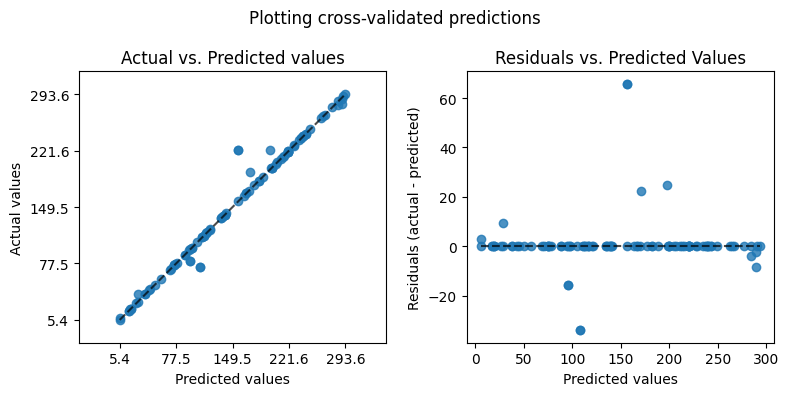

In [44]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = grid.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

modelo = DecisionTreeRegressor(max_depth=3, random_state=0)

In [46]:
modelo1 = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=0)


In [47]:
modelo1.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [48]:
modelo1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [49]:
print("Coeficiente de determinación R^2:", modelo1.score(X, y))

Coeficiente de determinación R^2: 0.6932627285022459


In [50]:
modelo1 = modelo1.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo1.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 45.39610879411633
MSE: 3353.260876846286
RMSE: 57.907347347692294
MEDIAN ABSOLUTE ERROR: 34.07471895822856
Coeficiente de determinación R^2: 0.6932627285022459
Explained_variance_score: 0.6553194423076861
Max Error: 143.05910461914456


In [51]:
round(sqrt(mean_squared_error(y_test, predicciones)),3)

46.699

## **Importancia de predictores**

In [102]:
importancia_predictores1 = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo1.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores1.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.981434
0,radio,0.018566
1,tv,0.000000


<Axes: title={'center': 'Feature Importance Random Forest Regressor'}>

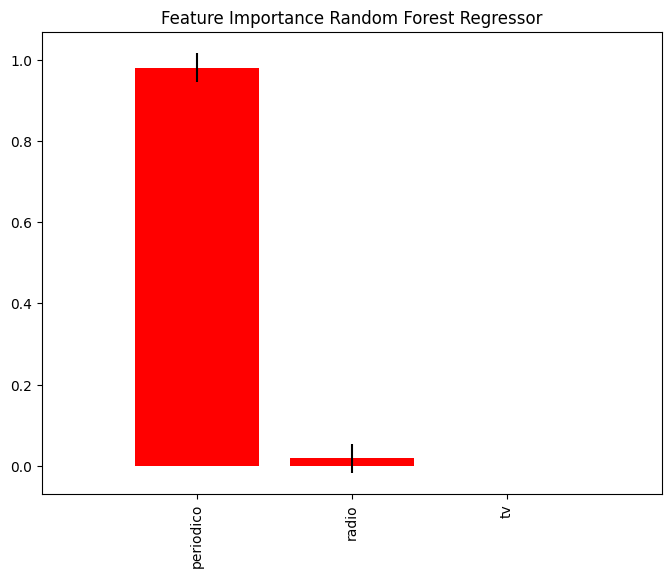

In [54]:
skplt.estimators.plot_feature_importances(
 modelo1,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance Random Forest Regressor",
 x_tick_rotation=90,
)

## **Graficando el modelo**

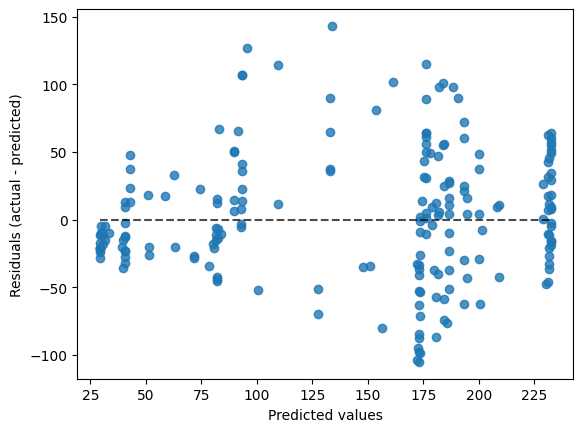

In [52]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(modelo1, X, y_true)
plt.show()

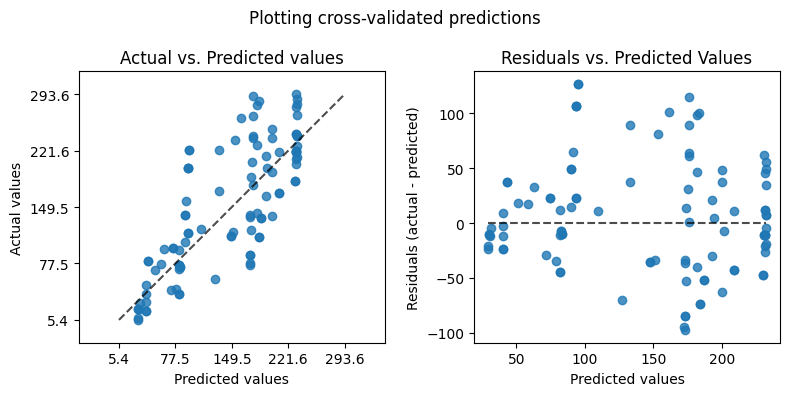

In [53]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = modelo1.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

### **Optimizacion random forest**

In [107]:
params = {'criterion': ['squared_error'], 'n_estimators': [100], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [1]
, 'min_weight_fraction_leaf': [0.0], 'max_features': [None], 'random_state': [None], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0]
, 'ccp_alpha': [0.0]}


In [108]:
grid1 = GridSearchCV(estimator=modelo1, param_grid=params, cv=5)

In [109]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=2, random_state=0),
             param_grid={'ccp_alpha': [0.0], 'criterion': ['squared_error'],
                         'max_depth': [None], 'max_features': [None],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'random_state': [None]})

In [110]:
grid1 =  GridSearchCV(estimator=modelo1, param_grid=params, cv=5)
grid1.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid1.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid1.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid1.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid1.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid1.score(X, y))


MAE: 16.308024999999965
MSE: 563.1728294249991
RMSE: 23.73126270186648
MEDIAN ABSOLUTE ERROR: 10.497999999999749
Coeficiente de determinación R^2: 0.9779962966239233


### **GradientBoostingRegressor**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


In [55]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
modelo2 = GradientBoostingRegressor(n_estimators=100,max_depth=2, random_state=0)

In [57]:
modelo2.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, random_state=0)

In [58]:
modelo2.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [59]:
print("Coeficiente de determinación R^2:", modelo2.score(X, y))

Coeficiente de determinación R^2: 0.9513329326711035


In [60]:
predicciones2 = modelo2.predict(X_test[['radio', 'tv', 'periodico']])
print(predicciones2[0:3,])

[220.92162461 103.37823289  46.53441296]


In [61]:
round(sqrt(mean_squared_error(y_test, predicciones2)),3)

30.547

In [62]:
round(metrics.median_absolute_error(y_test, predicciones2),3)

19.239

In [63]:
modelo2 = modelo2.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo2.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 22.74762422434423
MSE: 933.1237329837386
RMSE: 30.547074049468936
MEDIAN ABSOLUTE ERROR: 19.238624014503205
Coeficiente de determinación R^2: 0.9513329326711035
Explained_variance_score: 0.9013130032039502
Max Error: 113.65279617979812


## **Graficando el modelo**

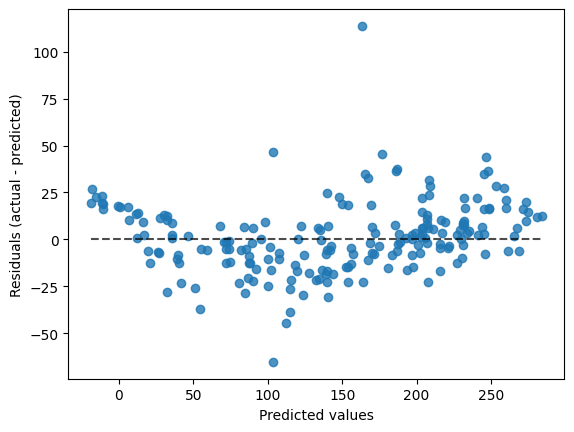

In [64]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(modelo2, X, y_true)
plt.show()

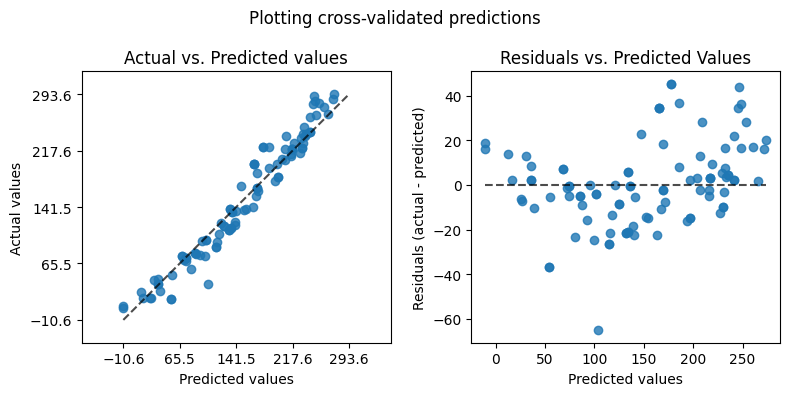

In [65]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = modelo2.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## **Importancia de predictores**

In [111]:
importancia_predictores2 = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo2.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores2.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.769381
0,radio,0.227618
1,tv,0.003001


<Axes: title={'center': 'Feature Importance GradientBoostingRegressor'}>

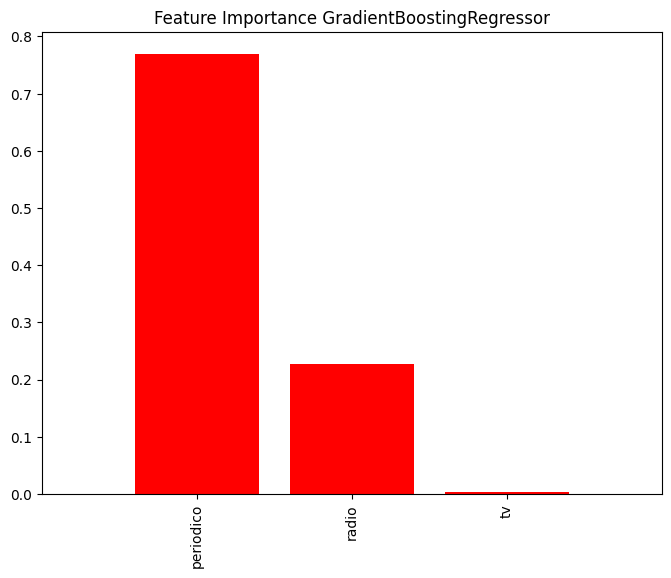

In [66]:
skplt.estimators.plot_feature_importances(
 modelo2,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance GradientBoostingRegressor",
 x_tick_rotation=90,
)

### **Optimizacion GradientBoostingRegressor**

In [133]:
params = {'criterion': ['squared_error'], 'n_estimators': [100], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [1]
, 'min_weight_fraction_leaf': [0.0], 'max_features': [None], 'random_state': [None], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0]
, 'ccp_alpha': [0.0]}


In [134]:
grid2 = GridSearchCV(estimator=modelo2, param_grid=params, cv=5)

In [135]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=2, random_state=0),
             param_grid={'ccp_alpha': [0.0], 'criterion': ['squared_error'],
                         'max_depth': [None], 'max_features': [None],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'random_state': [None]})

In [136]:
grid2 =  GridSearchCV(estimator=modelo2, param_grid=params, cv=5)
grid2.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid2.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid2.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid2.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid2.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid2.score(X, y))

MAE: 15.44114517181426
MSE: 511.6590747238615
RMSE: 22.61988228801957
MEDIAN ABSOLUTE ERROR: 10.314241082529557
Coeficiente de determinación R^2: 0.9860471105371292


### **AdaBoostRegressor**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

In [67]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [68]:
modelo3 = AdaBoostRegressor(random_state=0, n_estimators=100)
modelo3.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [69]:
print("Coeficiente de determinación R^2:", modelo3.score(X, y))

Coeficiente de determinación R^2: 0.9143150616872552


In [70]:
predicciones3 = modelo3.predict(X_test[['radio', 'tv', 'periodico']])
print(predicciones2[0:3,])

[220.92162461 103.37823289  46.53441296]


In [71]:
round(sqrt(mean_squared_error(y_test, predicciones3)),3)

29.563

In [72]:
round(metrics.median_absolute_error(y_test, predicciones3),3)

22.162

In [73]:
warnings.filterwarnings('ignore')

In [74]:
modelo3 = modelo3.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo3.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 24.558887745805045
MSE: 873.9915922256238
RMSE: 30.547074049468936
MEDIAN ABSOLUTE ERROR: 22.16166666666666
Coeficiente de determinación R^2: 0.9143150616872552
Explained_variance_score: 0.9027134208984695
Max Error: 79.87500000000003


## **Graficando el modelo**

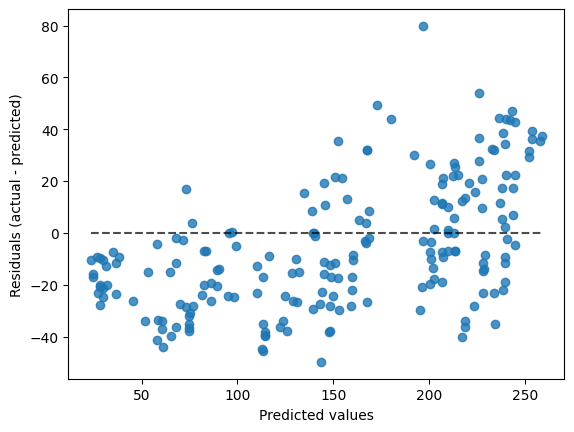

In [75]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(modelo3, X, y_true)
plt.show()

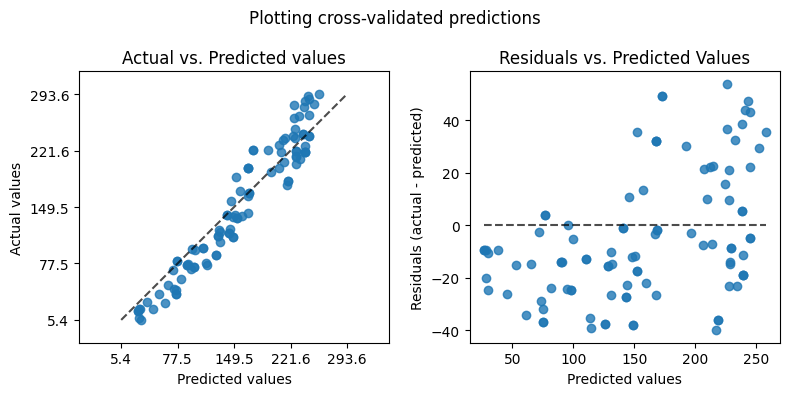

In [76]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = modelo3.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## **Importancia de predictores**

In [116]:
importancia_predictores3 = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo3.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores3.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.643396
0,radio,0.309512
1,tv,0.047092


<Axes: title={'center': 'Feature Importance  AdaBoostRegressor'}>

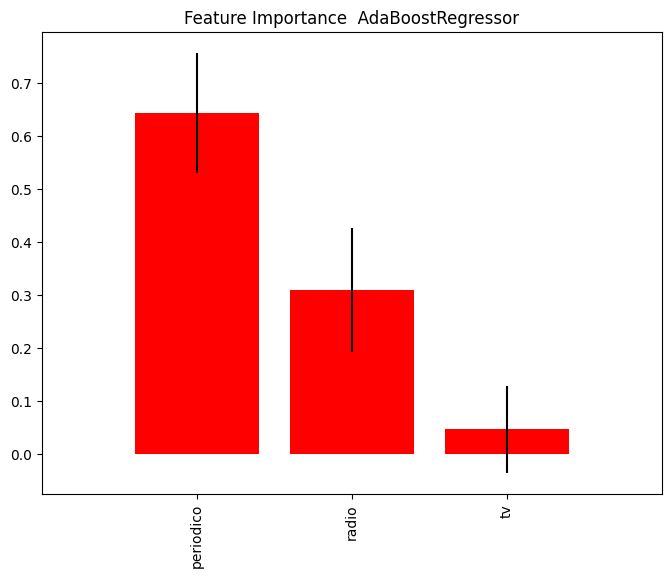

In [77]:
skplt.estimators.plot_feature_importances(
 modelo3,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance  AdaBoostRegressor",
 x_tick_rotation=90,
)

### **Optimizacion AdaBoostRegressor**

In [128]:
params = {'n_estimators': [50], 'learning_rate':[1.0], 'loss': ['linear']}  # Removed 'criterion'

In [129]:
grid3 = GridSearchCV(estimator=modelo3, param_grid=params, cv=5)

In [130]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(n_estimators=100, random_state=0),
             param_grid={'learning_rate': [1.0], 'loss': ['linear'],
                         'n_estimators': [50]})

In [131]:
grid3 =  GridSearchCV(estimator=modelo3, param_grid=params, cv=5)
grid3.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid3.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid3.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid3.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid3.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid3.score(X, y))

MAE: 24.82616109373753
MSE: 896.8012676015896
RMSE: 29.94664033913637
MEDIAN ABSOLUTE ERROR: 20.853571428571428
Coeficiente de determinación R^2: 0.9136618213079049


### **ExtraTreeRegressor**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

In [78]:
from sklearn.ensemble import ExtraTreesRegressor

In [79]:
modelo4 = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(
   X_train, y_train)

In [80]:
modelo4

ExtraTreesRegressor(random_state=0)

In [81]:
modelo4 = modelo4.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo4.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 10.255974999999994
MSE: 242.74483227499977
RMSE: 15.580270609812905
MEDIAN ABSOLUTE ERROR: 5.784999999999767
Coeficiente de determinación R^2: 0.9933803740606811
Explained_variance_score: 0.9743107731199276
Max Error: 55.38199999999992


## **Graficando el modelo**

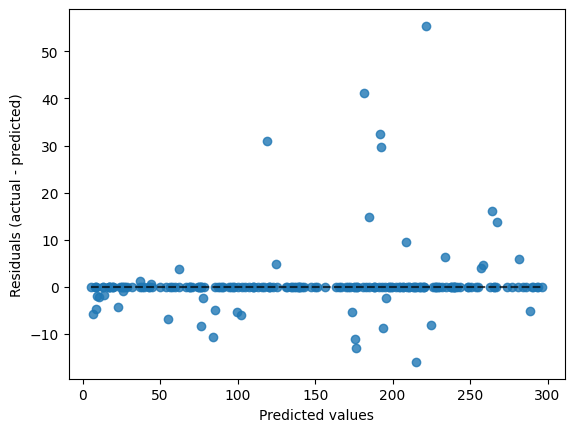

In [82]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(modelo4, X, y_true)
plt.show()

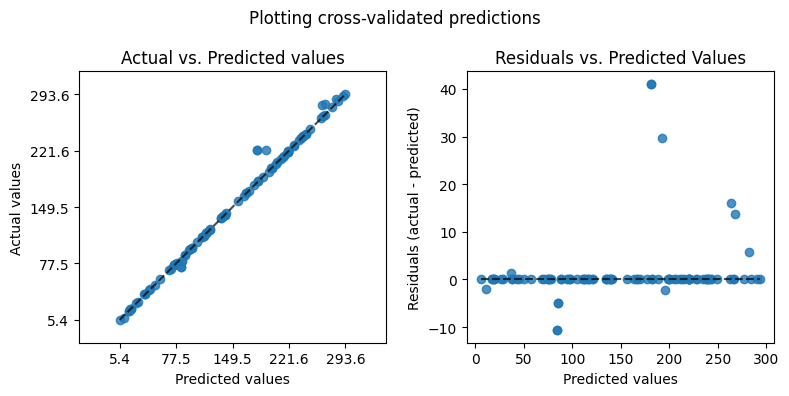

In [83]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = modelo4.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## **Importancia de predictores**

In [137]:
importancia_predictores4 = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo4.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores4.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.745927
0,radio,0.237146
1,tv,0.016927


<Axes: title={'center': 'Feature Importance ExtraTreesRegressor'}>

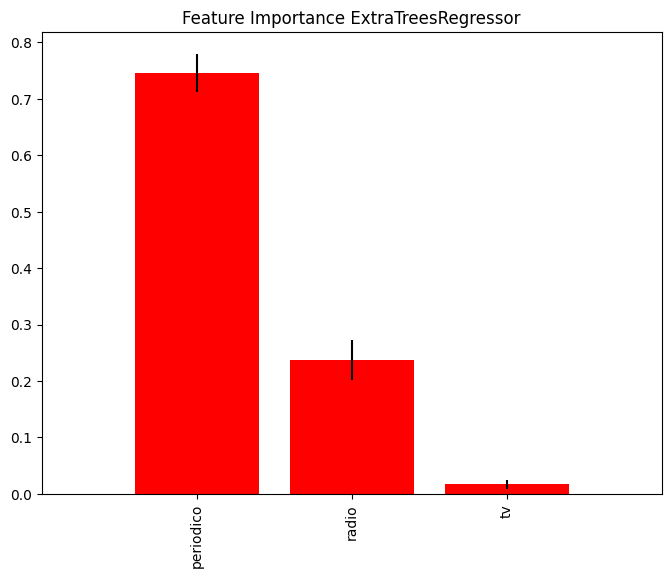

In [84]:
skplt.estimators.plot_feature_importances(
 modelo4,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance ExtraTreesRegressor",
 x_tick_rotation=90,
)

### **Optimizacion ExtratreeRegressor**

In [153]:
params = {'n_estimators': [100], 'criterion': ['squared_error']}  # Removed 'criterion'

In [154]:
grid4 = GridSearchCV(estimator=modelo4, param_grid=params, cv=5)

In [155]:
grid4.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=0),
             param_grid={'criterion': ['squared_error'], 'n_estimators': [100]})

In [156]:
grid4 =  GridSearchCV(estimator=modelo4, param_grid=params, cv=5)
grid4.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid4.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid4.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid4.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid4.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid4.score(X, y))

MAE: 10.255974999999994
MSE: 242.74483227499977
RMSE: 15.580270609812905
MEDIAN ABSOLUTE ERROR: 5.784999999999767
Coeficiente de determinación R^2: 0.9933803740606811


**HistGradientBoostingRegressor**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html

In [85]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [86]:
modelo5 = HistGradientBoostingRegressor(max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0).fit(X, y)

In [87]:
modelo5

HistGradientBoostingRegressor()

In [88]:
modelo5 = modelo5.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo5.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 23.283235505463153
MSE: 939.0113945044271
RMSE: 30.64329281432443
MEDIAN ABSOLUTE ERROR: 17.608254914273378
Coeficiente de determinación R^2: 0.9530505888855769
Explained_variance_score: 0.9073664059399849
Max Error: 75.00690236918436


## **Graficando el modelo**

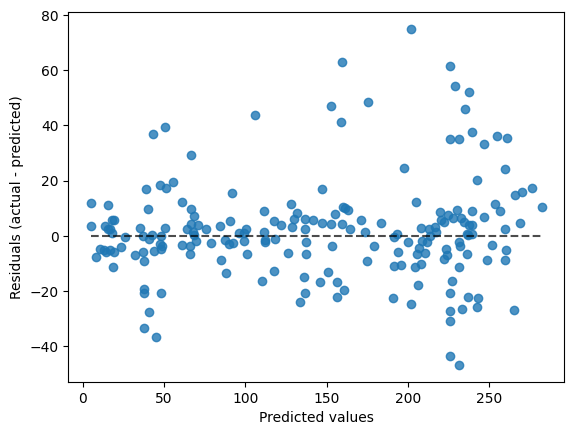

In [89]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(modelo5, X, y_true)
plt.show()

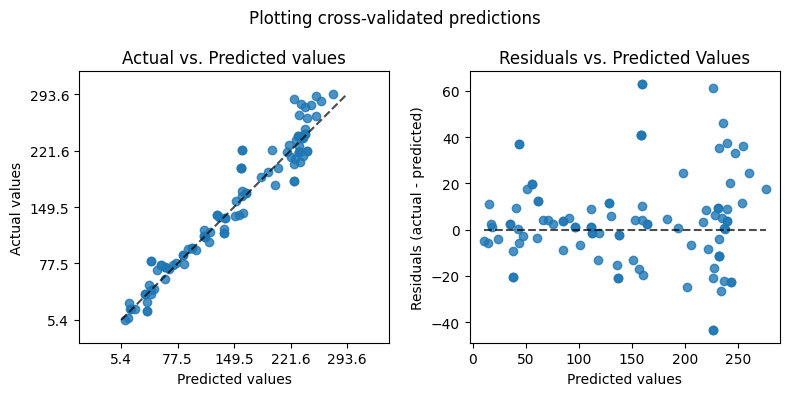

In [90]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = modelo5.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## ** NO hay Importancia de predictores en este Modelo**

### **Optimizacion HistGradientBoostingRegressor**

In [166]:
params = {'loss':['squared_error'], 'learning_rate': [1.0],'max_iter':[100], 'max_leaf_nodes':[31], 'max_depth':[None]}

In [167]:
grid5 = GridSearchCV(estimator=modelo5, param_grid=params, cv=5)

In [168]:
grid5.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [1.0], 'loss': ['squared_error'],
                         'max_depth': [None], 'max_iter': [100],
                         'max_leaf_nodes': [31]})

In [169]:
grid5 =  GridSearchCV(estimator=modelo5, param_grid=params, cv=5)
grid5.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid5.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid5.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid5.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid5.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid5.score(X, y))

MAE: 27.827216963053253
MSE: 1456.5931783122076
RMSE: 38.16534001305645
MEDIAN ABSOLUTE ERROR: 20.08646425088716
Coeficiente de determinación R^2: 0.9565626047446759


### **Comparacion de Modelos**

In [91]:
def evaluate_models(models, X_train, y_train, X_test, y_test, feature_names):
    pass

# Defino la lista de modelos
models = [modelo1, modelo2, modelo3, modelo4, modelo5]

# evaluo los modelos en entrenamiento y testeo
evaluate_models(models=models,
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                feature_names=['radio', 'tv', 'periodico']) # Assuming these are your feature names

In [92]:
def evaluate_models(models, X_train, y_train, X_test, y_test, feature_names):
    for i, model in enumerate(models):
        # Entreno el modelo
        model.fit(X_train, y_train)

        # hago la prediccion con el  conjunto de testeo
        # Uso el vector de entrada
        y_pred = model.predict(X_test[feature_names])

        # Calculo e imprimo las metrica
        print(f"\nModel {i} model:", type(model).__name__)
def evaluate_models(models, X_train, y_train, X_test, y_test, feature_names):
    for i, model in enumerate(models):
        # entreno el modelo
        model.fit(X_train, y_train)

        # Hago las predicciones del conjunto de testeo
        # Uso el vector de entrada
        y_pred = model.predict(X_test[feature_names])

        # Calculo e imprimo la performance de las metricas
        print(f"\nModel {i} model:", type(model).__name__)
        print(f"MAE:", mean_absolute_error(y_test, y_pred))
        print(f"MSE:", mean_squared_error(y_test, y_pred))
        print("Coeficiente de determinación R^2:", sorted([r2_score(y_test, y_pred)]))
        # ... (rest of the metrics) ...

# evaluo cada modelo y su metrica
evaluate_models(models=[modelo,modelo1, modelo2, modelo3, modelo4, modelo5],
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                feature_names=['radio', 'tv', 'periodico'])



Model 0 model: DecisionTreeRegressor
MAE: 33.59260590390003
MSE: 2180.8052228044044
Coeficiente de determinación R^2: [0.7568604020369176]

Model 1 model: RandomForestRegressor
MAE: 45.39610879411633
MSE: 3353.260876846286
Coeficiente de determinación R^2: [0.626142448240613]

Model 2 model: GradientBoostingRegressor
MAE: 22.74762422434423
MSE: 933.1237329837386
Coeficiente de determinación R^2: [0.8959653402720112]

Model 3 model: AdaBoostRegressor
MAE: 24.558887745805045
MSE: 873.9915922256238
Coeficiente de determinación R^2: [0.902558026670724]

Model 4 model: ExtraTreesRegressor
MAE: 10.255974999999994
MSE: 242.74483227499977
Coeficiente de determinación R^2: [0.9729361979191056]

Model 5 model: HistGradientBoostingRegressor
MAE: 23.283235505463153
MSE: 939.0113945044271
Coeficiente de determinación R^2: [0.8953089205055352]


### **Comparacion de Modelos Optimizados**

In [172]:
def evaluate_grids(grids, X_train, y_train, X_test, y_test, feature_names):
    pass

# Defino la lista de modelos
models = [grid,grid1, grid2, grid3, grid4, grid5]

# evaluo los modelos en entrenamiento y testeo
# Change 'models=' to 'grids=' to match the function definition
evaluate_grids(grids=models,
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                feature_names=['radio', 'tv', 'periodico']) # Assuming these are your feature names

In [178]:
# Assuming 'grid' is an example of one of your GridSearchCV objects
grid = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={'n_estimators': [100, 200, 300]},  # Ensure n_estimators are integers
    cv=5
)

# ... (rest of your code) ...

# Within evaluate_models function:
def evaluate_models(models, X_train, y_train, X_test, y_test, feature_names):
    for i, model in enumerate(models):
        # entreno el modelo
        model.fit(X_train, y_train) # model should be used here, not just 'grid'

        # Hago las predicciones del conjunto de testeo
        # Uso el vector de entrada
        y_pred = model.predict(X_test[feature_names])

        # Calculo e imprimo la performance de las metricas
        print(f"\nModel {i} grid:", type(model).__name__) # model type, not grid
        print(f"MAE:", mean_absolute_error(y_test, y_pred))
        print(f"MSE:", mean_squared_error(y_test, y_pred))
        print("Coeficiente de determinación R^2:", sorted([r2_score(y_test, y_pred)]))
        # ... (rest of the metrics) ...
evaluate_models(models=[grid,grid1, grid2, grid3, grid4, grid5], # Changed 'grids=' to 'models='
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                feature_names=['radio', 'tv', 'periodico'])


Model 0 grid: GridSearchCV
MAE: 15.68164999999998
MSE: 502.81503005
Coeficiente de determinación R^2: [0.9439407779393799]

Model 1 grid: GridSearchCV
MAE: 15.42189999999998
MSE: 486.5516044500003
Coeficiente de determinación R^2: [0.945753999368115]

Model 2 grid: GridSearchCV
MAE: 15.313077454597963
MSE: 525.4059966410312
Coeficiente de determinación R^2: [0.9414220942545173]

Model 3 grid: GridSearchCV
MAE: 24.82616109373753
MSE: 896.8012676015896
Coeficiente de determinación R^2: [0.900014958980594]

Model 4 grid: GridSearchCV
MAE: 10.255974999999994
MSE: 242.74483227499977
Coeficiente de determinación R^2: [0.9729361979191056]

Model 5 grid: GridSearchCV
MAE: 27.827216963053253
MSE: 1456.5931783122076
Coeficiente de determinación R^2: [0.8376033420741846]
